In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-trig-fft)

This function has frequency content at $2\pi$, $-2\pi$, and $\pi$.

In [2]:
f = lambda x: 3 * cos(2 * pi * x) - exp(1j * pi * x)

To use `fft`, we set up nodes in the interval $[0,2)$.

In [3]:
n = 4
N = 2 * n + 1
t = 2 * arange(0, N) / N    # nodes in [0,2)
y = f(t)

We perform Fourier analysis using `fft` and then examine the resulting coefficients.

In [4]:
from scipy.fftpack import fft, ifft, fftshift
c = fft(y) / N
freq = hstack([arange(n+1), arange(-n,0)])
results = PrettyTable()
results.add_column("freq", freq) 
results.add_column("coefficient", c)
results

freq,coefficient
0,(-7.401486830834377e-17-1.2335811384723961e-17j)
1,(-1+3.7511926088583134e-16j)
2,(1.4999999999999996-6.858640241643501e-16j)
3,(2.006783528541028e-16-4.9343245538895844e-17j)
4,(1.9737298215558337e-16+1.9273910434303325e-16j)
-4,(9.048923903630054e-17-2.3825059632365783e-16j)
-3,(2.434108569959598e-16-4.9343245538895844e-17j)
-2,(1.4999999999999998+7.05529154045317e-16j)
-1,(-9.048923903630054e-17-2.3825059632365783e-16j)


Note that $1.5 e^{2i\pi x}+1.5 e^{-2i\pi x} = 3 \cos(2\pi x)$, so this result is sensible.

Fourier's greatest contribution to mathematics was to point out that *every* periodic function is just a combination of frequencies—infinitely many of them in general, but truncated for computational use. Here we look at the magnitudes of the coefficients for $f(x) = \exp( \sin(\pi x) )$.

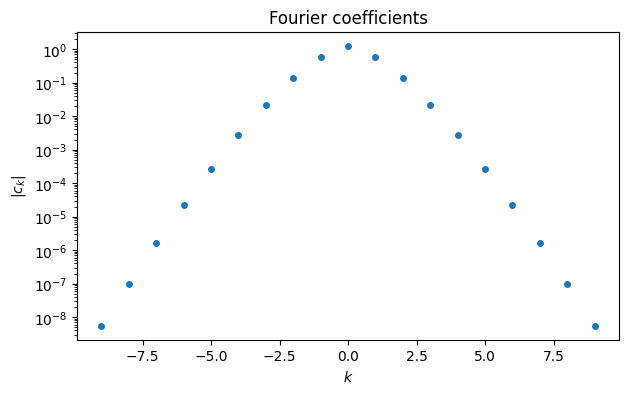

In [5]:
f = lambda x: exp(sin(pi * x))    # content at all frequencies
n = 9;  N = 2*n + 1;
t = 2 * arange(0, N) / N    # nodes in [0,2)
c = fft(f(t)) / N

semilogy(range(-n, n+1), abs(fftshift(c)), "o")
xlabel("$k$"),  ylabel("$|c_k|$")
title("Fourier coefficients");

The Fourier coefficients of smooth functions decay exponentially in magnitude as a function of the frequency. This decay rate is determines the convergence of the interpolation error.